# Import Packages and data exploration

In [8]:
import pandas as pd

In [68]:
dataset = pd.read_csv('vdjdb.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   complex.id        92771 non-null  int64 
 1   gene              92771 non-null  object
 2   cdr3              92771 non-null  object
 3   v.segm            92670 non-null  object
 4   j.segm            91626 non-null  object
 5   species           92771 non-null  object
 6   mhc.a             92771 non-null  object
 7   mhc.b             92771 non-null  object
 8   mhc.class         92771 non-null  object
 9   antigen.epitope   92771 non-null  object
 10  antigen.gene      92709 non-null  object
 11  antigen.species   92771 non-null  object
 12  reference.id      91260 non-null  object
 13  method            92771 non-null  object
 14  meta              92771 non-null  object
 15  cdr3fix           92771 non-null  object
 16  vdjdb.score       92771 non-null  int64 
 17  web.method  

In [69]:
dataset.isnull().sum()

complex.id             0
gene                   0
cdr3                   0
v.segm               101
j.segm              1145
species                0
mhc.a                  0
mhc.b                  0
mhc.class              0
antigen.epitope        0
antigen.gene          62
antigen.species        0
reference.id        1511
method                 0
meta                   0
cdr3fix                0
vdjdb.score            0
web.method             0
web.method.seq         0
web.cdr3fix.nc         0
web.cdr3fix.unmp       0
dtype: int64

# Data Transformation

## Removing Unwanted Columns

Some of the columns contain specific information about the literature sources (reference.id), sequencing methods (method, web.method.seq), collection method (web.method) etc., some of which are related to how **vdjdb.score** is calculated.

Therefore we first remove these columns. Deleted columns are as follows: 
-  reference.id
-  method
-  meta
-  cdr3fix
-  web.method  
-  web.method.seq
-  web.cdr3fix.nc
-  web.cdr3fix.unmp

(Work by Yutong)

In [70]:
dataset = dataset.iloc[:, list(range(0, 12)) + [16]]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       92771 non-null  int64 
 1   gene             92771 non-null  object
 2   cdr3             92771 non-null  object
 3   v.segm           92670 non-null  object
 4   j.segm           91626 non-null  object
 5   species          92771 non-null  object
 6   mhc.a            92771 non-null  object
 7   mhc.b            92771 non-null  object
 8   mhc.class        92771 non-null  object
 9   antigen.epitope  92771 non-null  object
 10  antigen.gene     92709 non-null  object
 11  antigen.species  92771 non-null  object
 12  vdjdb.score      92771 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 9.2+ MB


## Combine cdr3-v_seg-j_seg in one column

In [71]:
def create_cdr3_v_j_column(row):
    """
    This function will combine cdr3, v-segm and j-segm
    """
    cdr3 = row['cdr3']
    v_segm = row['v.segm']
    j_segm = row['j.segm']
    final_string = ''
    
    if not pd.isna(cdr3):
        final_string = cdr3
    if not pd.isna(v_segm):
        final_string = final_string + '_' + v_segm
    if not pd.isna(j_segm):
        final_string = final_string + '_' + j_segm
    
    return final_string

dataset['cdr3_v_j'] = dataset.apply(create_cdr3_v_j_column,axis=1)

In [72]:
dataset['cdr3_v_j'].head(5)

0          CIVRAPGRADMRF_TRAV26-1*01_TRAJ43*01
1    CASSYLPGQGDHYSNQPQHF_TRBV13*01_TRBJ1-5*01
2     CASSFEAGQGFFSNQPQHF_TRBV13*01_TRBJ1-5*01
3           CAVPSGAGSYQLTF_TRAV20*01_TRAJ28*01
4     CASSFEPGQGFYSNQPQHF_TRBV13*01_TRBJ1-5*01
Name: cdr3_v_j, dtype: object

## Separate Alpha, Beta chains datasets

In [76]:
dataset['gene'].unique()

array(['TRA', 'TRB'], dtype=object)

In [77]:
dataset_alpha = dataset[dataset['gene'] == 'TRA']
dataset_beta = dataset[dataset['gene'] == 'TRB']

In [78]:
dataset_alpha.head(4)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,cdr3_v_j
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CIVRAPGRADMRF_TRAV26-1*01_TRAJ43*01
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CAVPSGAGSYQLTF_TRAV20*01_TRAJ28*01
5,3,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CAVKASGSRLT_TRAV2*01
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CAYRPPGTYKYIF_TRAV38-2/DV8*01_TRAJ40*01


In [79]:
dataset_beta.head(4)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,cdr3_v_j
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CASSYLPGQGDHYSNQPQHF_TRBV13*01_TRBJ1-5*01
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CASSFEAGQGFFSNQPQHF_TRBV13*01_TRBJ1-5*01
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CASSFEPGQGFYSNQPQHF_TRBV13*01_TRBJ1-5*01
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,CASSYEPGQVSHYSNQPQHF_TRBV13*01_TRBJ1-5*01


# Relationship Exploration 

## Dataset grouped on anitegen.epitoge, finding the count of cdr3_v_j

In [74]:
group_epitope_cdr3_v_j = dataset.groupby('antigen.epitope')['cdr3_v_j'].unique().reset_index()
group_epitope_cdr3_v_j['count'] = group_epitope_cdr3_v_j.apply(lambda x: len(x['cdr3_v_j']),axis=1)
group_epitope_cdr3_v_j.head(5)

,antigen.epitope,cdr3_v_j,count
0,AAFKRSCLK,"[CVVNGNNNDMRF_TRAV12-1*01_TRAJ43*01, CASSQGFGA...",10
1,AAGIGILTV,"[CAVNFGGGKLIF_TRAV12-2*01_TRAJ23*01, CASSLSFGT...",9
2,AALALLLLDRLNQLE,"[CALPREYGNKLVF_TRAV16*01_TRAJ47*01, CASARRTSGE...",6
3,AALPILFQV,"[CAGLPYGQNFVF_TRAV35*01_TRAJ26*01, CASSPVGWGNT...",2
4,AAVVRFQEAANKQKQ,"[CAVSRAGAGSYQLTF_TRAV2*01_TRAJ28*01, CSARAGGGE...",4


### Finding top 10 values

In [129]:
group_epitope_cdr3_v_j.sort_values(['count'],ascending=False,inplace=True)
group_epitope_cdr3_v_j

,antigen.epitope,cdr3_v_j,count
427,KLGGALQAK,"[CADLGSQGNLIF_TRAV5*01_TRAJ42*01, CASSEGWHSYEQ...",25068
670,NLVPMVATV,"[CASSPQTGTGGYGYTF_TRBV6-5*01, CASSPLFGTSGGETYY...",7249
285,GILGFVFTL,"[CAGAGSQGNLIF_TRAV27*01_TRAJ42*01, CASSSRSSYEQ...",6953
78,AVFDRKSDAK,"[CASGWGSQPQHF_TRBV7-9*01_TRBJ1-5*01, CASSLNRGA...",3262
140,ELAGIGILTV,"[CAYTVLGNEKLTF_TRAV38-1*01_TRAJ48*01, CASSFTPY...",1803
...,...,...,...
1139,YQDVDCTEV,[CASSIRRDTQYF_TRBV19*01_TRBJ2-3*01],1
955,TLNDLNETL,[CASSPDNYGYTF_TRBV27*01_TRBJ1-2*01],1
771,RILLVAASY,[CASSLYRGKETQYF_TRBV11-2*01_TRBJ2-5*01],1
831,RVCTNYMPY,[CASSFWANTEAFF_TRBV7-6*01_TRBJ1-1*01],1


## Dataset grouped on species & anitegen.epitoge, finding the count of cdr3_v_j

In [84]:
group_epitope_species_cdr3_v_j = dataset.groupby(['antigen.epitope','species'])['cdr3_v_j'].unique().reset_index()
group_epitope_species_cdr3_v_j['count'] = group_epitope_species_cdr3_v_j.apply(lambda x: len(x['cdr3_v_j']),axis=1)

### Top 10 values

In [130]:
group_epitope_species_cdr3_v_j.sort_values(['count'],ascending=False,inplace=True)
group_epitope_species_cdr3_v_j

,antigen.epitope,species,cdr3_v_j,count
427,KLGGALQAK,HomoSapiens,"[CADLGSQGNLIF_TRAV5*01_TRAJ42*01, CASSEGWHSYEQ...",25068
670,NLVPMVATV,HomoSapiens,"[CASSPQTGTGGYGYTF_TRBV6-5*01, CASSPLFGTSGGETYY...",7249
285,GILGFVFTL,HomoSapiens,"[CAGAGSQGNLIF_TRAV27*01_TRAJ42*01, CASSSRSSYEQ...",6953
78,AVFDRKSDAK,HomoSapiens,"[CASGWGSQPQHF_TRBV7-9*01_TRBJ1-5*01, CASSLNRGA...",3262
140,ELAGIGILTV,HomoSapiens,"[CAYTVLGNEKLTF_TRAV38-1*01_TRAJ48*01, CASSFTPY...",1803
...,...,...,...,...
598,LYDANYFLC,HomoSapiens,[CASTLDGSNQPQHF_TRBV28*01_TRBJ1-5*01],1
591,LVFLFVAAI,HomoSapiens,[CASSHLTGDIYNEQFF_TRBV3-1*01_TRBJ2-1*01],1
1021,VLLSMQGAV,HomoSapiens,[CASSSPVFGGELFF_TRBV11-2*01_TRBJ2-2*01],1
242,FRNEGIHL,HomoSapiens,[CASSVGNGASTDTQYF_TRBV9*01_TRBJ2-3*01],1


## Count of most occurring CDR3_V_J combinations for each species

In [120]:
count_of_cdr3_v_j_df = dataset.groupby(['cdr3_v_j','species']).size().to_frame('count').reset_index()

In [126]:
count_of_cdr3_v_j_df.sort_values(['count'],ascending=False,inplace=True)

In [127]:
count_of_cdr3_v_j_df['species'].unique()

array(['HomoSapiens', 'MusMusculus', 'MacacaMulatta'], dtype=object)

## Count of records for each species

In [132]:
count_of_species_df = dataset.groupby(['species']).size().to_frame('count').reset_index()

In [133]:
count_of_species_df

,species,count
0,HomoSapiens,85329
1,MacacaMulatta,2119
2,MusMusculus,5323


## Count of records for each species and vdj_score

In [138]:
count_of_species_df = dataset.groupby(['species','vdjdb.score']).size().to_frame('count').reset_index()

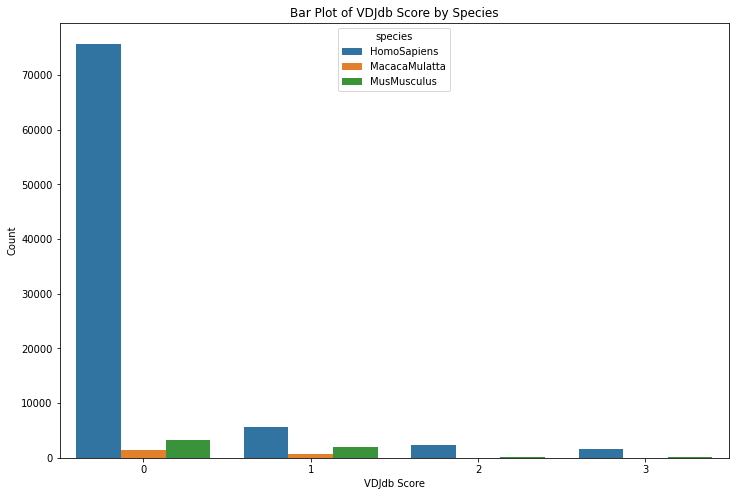

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='vdjdb.score', y='count', hue='species', data=count_of_species_df)
plt.title('Bar Plot of VDJdb Score by Species')
plt.xlabel('VDJdb Score')
plt.ylabel('Count')

# Save the plot as an image (PNG format by default)
plt.savefig('Figures/Bar_Plot_of_VDJdb_Score_by_Species.png')

plt.show()

In [140]:
count_of_species_df

,species,vdjdb.score,count
0,HomoSapiens,0,75747
1,HomoSapiens,1,5700
2,HomoSapiens,2,2280
3,HomoSapiens,3,1602
4,MacacaMulatta,0,1432
5,MacacaMulatta,1,687
6,MusMusculus,0,3178
7,MusMusculus,1,1942
8,MusMusculus,2,56
9,MusMusculus,3,147
